<a href="https://colab.research.google.com/github/nowhyun/Study/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%83%80%EC%9E%85(Data_Type)%EB%B3%84_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[링크](https://junklee.tistory.com/10)의 내용과 연계해서 코드를 보시면 효과적입니다.

# 라이브러리 불러오기

In [1]:
#데이터 분석 및 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
print("matplotlib version: {}". format(mpl.__version__))

import seaborn as sns
print("seaborn version: {}". format(sns.__version__))

#스타일 설정
sns.set_style('whitegrid')

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import numpy as np
print("numpy version: {}". format(np.__version__))

#기타 라이브러리
import os
import random
import time

#경고 에러 무시
import warnings
warnings.filterwarnings('ignore')
print('-'*50)

matplotlib version: 3.1.3
seaborn version: 0.10.0
pandas version: 0.25.3
numpy version: 1.17.5
--------------------------------------------------


# 1. 일변량 연속형 데이터
  해당 예시에서는 seaborn의 tips데이터셋 중 일변량 연속 데이터로써 total_bill을 사용하겠습니다.

In [2]:
dataset = sns.load_dataset('tips')
print(dataset); print('-'*50)
print(dataset.info()); print('-'*50)
print(dataset.describe()); print('-'*50)
print('일변량 연속형 데이터:\n',dataset.total_bill.values)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null cate

## 히스토그램(Histogram)

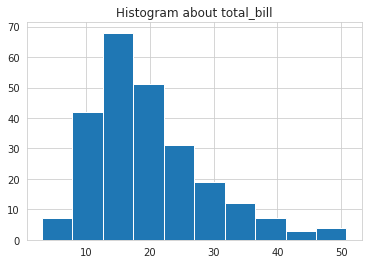

In [3]:
# plt.hist(x=dataset.total_bill, bins=10, density=True) #확률
plt.hist(x=dataset.total_bill, bins=10, density=False) #빈도수
plt.title('Histogram about total_bill')
plt.show()

## 커널 밀도 곡선(Kernel Density Curve)
  커널 밀도 추정(Kernel Density Estimator, KDE)를 적용하여, 히스토그램을 부드러운 형태의 곡선을로써 보여주는 방법입니다. KDE에 대해 잘 알고 싶다면 [클릭](https://darkpgmr.tistory.com/147)

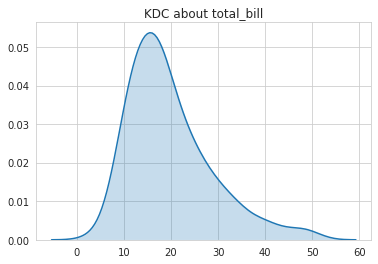

In [4]:
#data: list, pandas.DataFrame, numpy.array dataset
sns.kdeplot(data=dataset.total_bill.values, shade=True) 
# sns.kdeplot(data=dataset.tip.values, shade=True)
# plt.legend(['total_bill','tip'])
plt.title('KDC about total_bill')
plt.show()

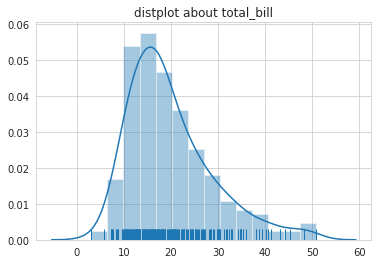

In [5]:
#히스토그램과 커널 밀도 곡선, 러그 플롯을 동시에 표현하는 코드입니다. 복잡해보이지만 가장 효율적인 코드라 생각됩니다.
sns.distplot(a=dataset.total_bill.values, kde=True, rug=True)
plt.title('distplot about total_bill')
plt.show()

## 박스 플롯(Box Plot)

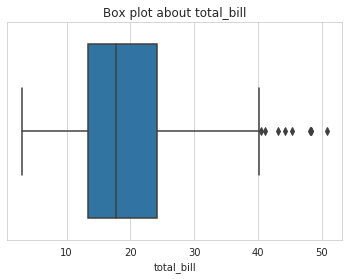

In [6]:
sns.boxplot(y='total_bill', data=dataset, orient='h')
plt.title('Box plot about total_bill')
plt.show()

## 바이올린 플롯(Violing Plot)

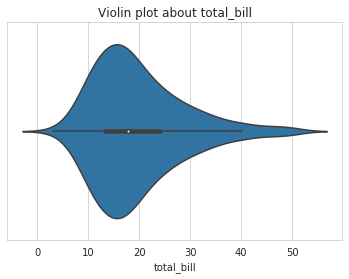

In [7]:
sns.violinplot(y='total_bill', data=dataset, orient='h')
plt.title('Violin plot about total_bill')
plt.show()

# 2. 일변량 범주형 데이터
  해당 예시에서는 일변량 범주형 데이터로써 day를 사용하겠습니다.

In [8]:
print('일변량 범주형 데이터:\n',dataset.day.values)

일변량 범주형 데이터:
 [Sun, Sun, Sun, Sun, Sun, ..., Sat, Sat, Sat, Sat, Thur]
Length: 244
Categories (4, object): [Thur, Fri, Sat, Sun]


## 막대 그래프(Bar Chart)
  막대 그래프의 경우 범주형 데이터에 사용되기 때문에 히스토그램과는 달리 막대 사이의 간극이 벌려져 있습니다. 이번 코드에서는 일변량 데이터에 대해 적용하였기에 사실상 sns.countplot을 같이 사용하였습니다만, plt.bar를 사용하여 다변량의 비교도 당연히 가능합니다. 

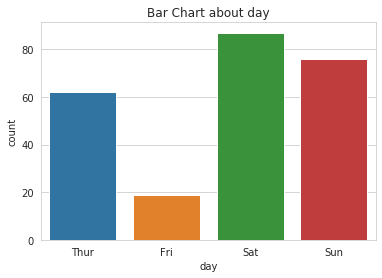

In [9]:
sns.countplot(x='day', data=dataset)
plt.title('Bar Chart about day')
plt.show()

In [10]:
print(dataset.day.value_counts()); print()
print('범주 목록:\n', dataset.day.value_counts().index.values); print()
print('범주당 개수:\n', dataset.day.value_counts().values)

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

범주 목록:
 [Sat, Sun, Thur, Fri]
Categories (4, object): [Thur, Fri, Sat, Sun]

범주당 개수:
 [87 76 62 19]


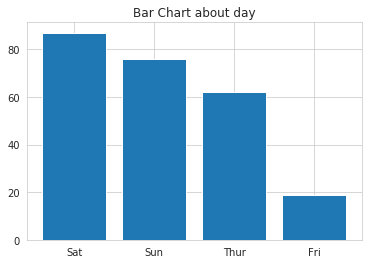

In [11]:
plt.bar(x=dataset.day.value_counts().index.values, height=dataset.day.value_counts().values)
plt.title('Bar Chart about day')
plt.show()

## 원 그래프(Pie Chart)

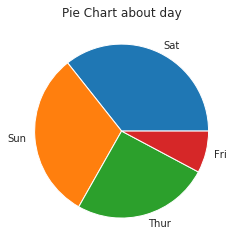

In [12]:
plt.pie(dataset.day.value_counts().values, labels=dataset.day.value_counts().index.values)
plt.title('Pie Chart about day')
plt.show()

# 3. 다변량 연속형 데이터

##선 그래프(Line Chart)
  이번 예시에서는 체중-몸무게 데이터셋을 사용하겠습니다. x축이 시간일 때는 시계열 그래프라고도 합니다.

In [13]:
dataset2 = pd.DataFrame({
 "weight": [80.0, 70.4, 65.5, 45.9, 51.2],
 "height": [170, 180, 155, 143, 154],
 "type": [ "f", "n", "n", "t", "t"]
})
print(dataset2); print()
dataset2.sort_values(by='weight', inplace=True, ascending=True) # weight 기준으로 오름차순 정렬
print(dataset2)

   weight  height type
0    80.0     170    f
1    70.4     180    n
2    65.5     155    n
3    45.9     143    t
4    51.2     154    t

   weight  height type
3    45.9     143    t
4    51.2     154    t
2    65.5     155    n
1    70.4     180    n
0    80.0     170    f


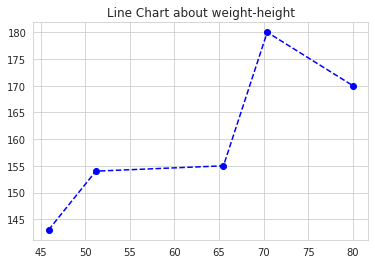

In [14]:
#x축을 weight, y축을 height로 갖는 선 그래프
plt.plot(dataset2.weight.values, dataset2.height.values, color='b', linestyle='--', marker='o')
plt.title('Line Chart about weight-height')
plt.show()

##산점도(Scatter)
  이번 예시에서는 seaborn의 iris데이터셋을 사용하겠습니다.

In [15]:
dataset2 = sns.load_dataset("iris")
print(dataset2); print('-'*50)
print(dataset2.info()); print('-'*50)
print(dataset2.describe()); print('-'*50)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 col

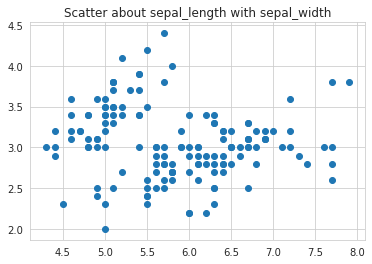

In [16]:
plt.scatter(dataset2.sepal_length.values, dataset2.sepal_width.values)
plt.title('Scatter about sepal_length with sepal_width')
plt.show()

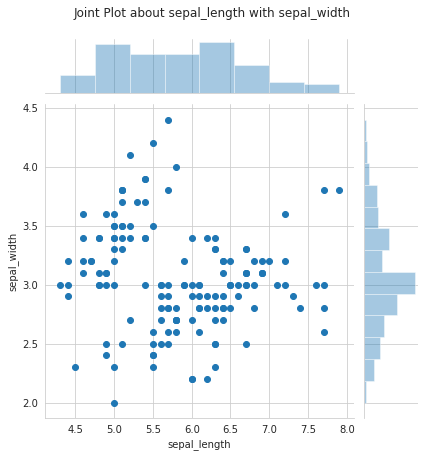

In [17]:
#seaborn의 jointplot을 활용하면 2가지 플롯을 동시에 구현할 수 있습니다.
sns.jointplot(x='sepal_length', y='sepal_width', data=dataset2, kind='scatter')
plt.suptitle('Joint Plot about sepal_length with sepal_width', y=1.05)
plt.show()

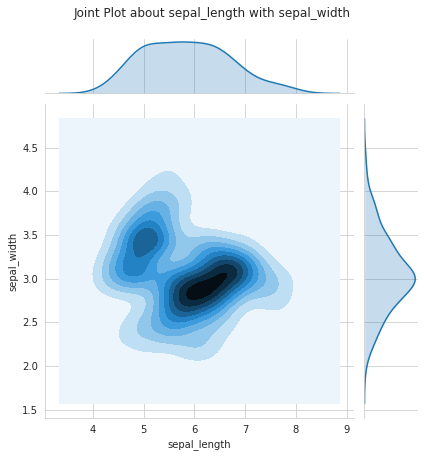

In [18]:
#kind 지정에 따라 바리에이션이 가능합니다.
sns.jointplot(x='sepal_length', y='sepal_width', data=dataset2, kind='kde')
plt.suptitle('Joint Plot about sepal_length with sepal_width', y=1.05)
plt.show()

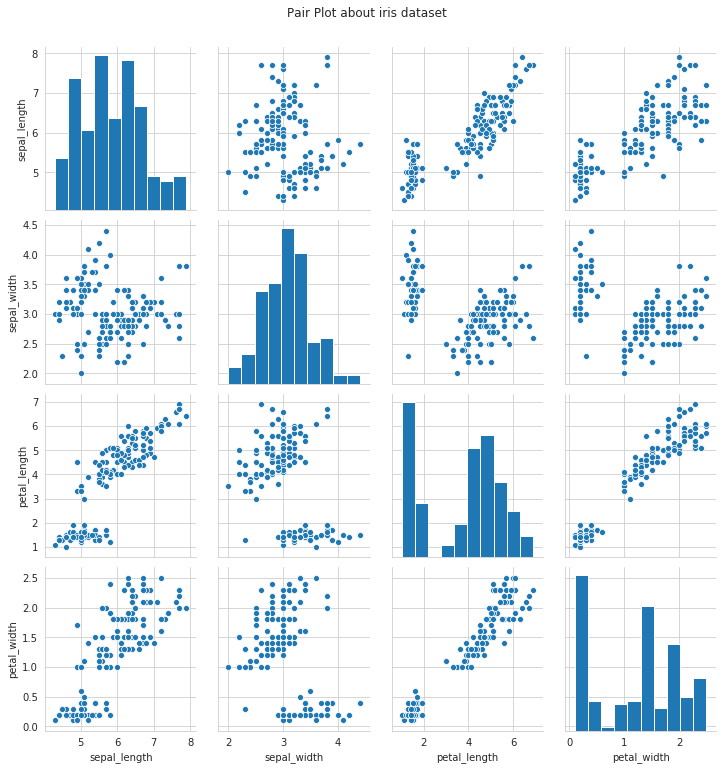

In [19]:
#한번에 모든 그래프를 확인하고 싶을 땐, seaborn의 pairplot을 사용할 수 있습니다.
sns.pairplot(dataset2)
plt.suptitle('Pair Plot about iris dataset', y=1.05)
plt.show()

# 4.다변량 범주형 데이터

##히트맵(Heatmap)

In [20]:
dataset3 = sns.load_dataset("flights")
print(dataset3); print('-'*50)
print(dataset3.info()); print('-'*50)
print(dataset3.describe()); print('-'*50)

     year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
year          144 non-null int64
month         144 non-null category
passengers    144 non-null int64
dtypes: category(1), int64(2)
memory usage: 2.9 KB
None
--------------------------------------------------
              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000

In [21]:
#히트맵을 구성하기 앞서 필요한 특성으로 피봇 테이블을 만들어줍니다.
pivot_table = dataset3.pivot(index='month', columns='year', values='passengers')
pivot_table.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


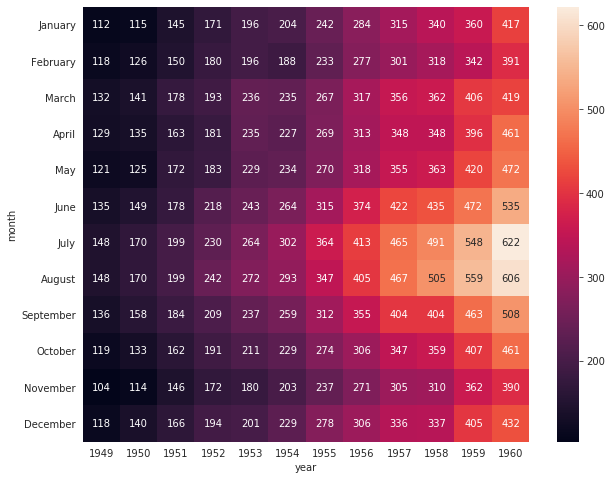

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(pivot_table, annot=True, fmt='d')
plt.show()